In [1]:
import numpy as np, matplotlib.pyplot as plt, seaborn as sns, pandas as pd
sns.set()

In [2]:
df = pd.read_csv('data/NADAC__National_Average_Drug_Acquisition_Cost_.csv')


In [3]:
df.drop_duplicates(subset="Effective_Date", inplace=True)
df['Effective_Date'] =  pd.to_datetime(df['Effective_Date'])
df['Month'] = df['Effective_Date'].dt.month
df['Year'] = df['Effective_Date'].dt.year

In [4]:
new_df = pd.DataFrame()
new_df['avg_NADAC_Per_unit'] = df.groupby(['Month', 'Year', 'OTC'])['NADAC_Per_Unit'].mean()
new_df.reset_index(inplace=True)
new_df['Day'] = '01'
new_df['Effective_Date'] = pd.to_datetime(new_df[['Year', 'Month', 'Day']])
new_df.sort_values(by='Effective_Date', inplace=True)

Text(0.5, 1.0, 'Monthly Trends in Over the Counter and Non Over the Counter Drugs')

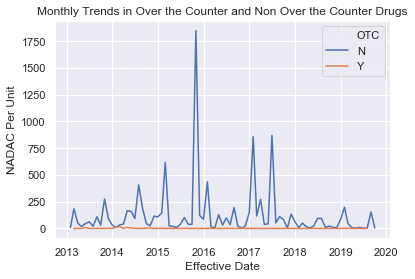

In [7]:
sns.lineplot(x='Effective_Date', y='avg_NADAC_Per_unit', hue='OTC', data=new_df)
plt.xlabel('Effective Date')
plt.ylabel('NADAC Per Unit')
plt.title('Monthly Trends in Over the Counter and Non Over the Counter Drugs')